In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
from os import listdir
from tqdm import tqdm

In [2]:
path_spectros = r"C:\Users\ibiza\OneDrive\Desktop\Cours\Python\Time Series\Son\Data\Plots\SPECTROS"
path_wavs = r"C:\Users\ibiza\OneDrive\Desktop\Cours\Python\Time Series\Son\Data\WAV"

In [3]:
liste_wavs = listdir(path_wavs)
liste_wavs = [path_wavs+"\\"+pokemon for pokemon in liste_wavs]
liste_wavs

['C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\abomasnow.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\abra.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\absol.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\accelgor.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\aegislash.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\aerodactyl.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\aggron.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\aipom.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\alakazam.wav',
 'C:\\Users\\ibiza\\OneDrive\\Desktop\\Cours\\Python\\Time Series\\Son\\Data\\WAV\\alcremie.wav',
 'C:\\Users\\ibiza\\OneDrive

Text(0, 0.5, 'Amplitude')

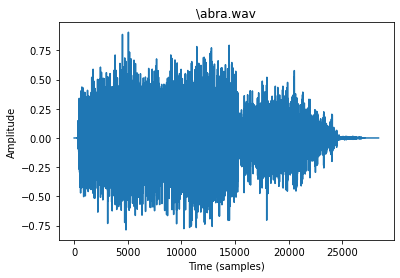

In [4]:
#Visualisation d'un son 
sound, sr = librosa.load(liste_wavs[1]) #Sample rate assez faible pour éviter d'avoir des elements trop lourds
plt.plot(sound);
plt.title(liste_wavs[1].split("WAV")[1])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
   

Text(0.5, 1.0, '\\abra.wav')

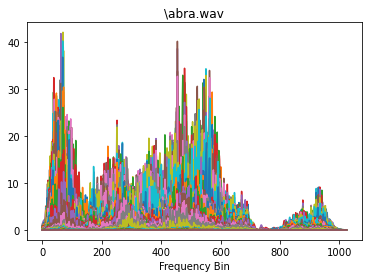

In [5]:
#Short Time Fourier Transform
ft = np.abs(librosa.stft(sound))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.title(liste_wavs[1].split("WAV")[1])

Text(0.5, 1.0, '\\abra.wav')

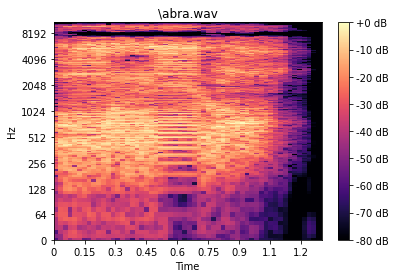

In [19]:
#Spectrogramme
spec = np.abs(librosa.stft(sound))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title(liste_wavs[1].split("WAV")[1])

In [10]:
#https://www.kaggle.com/davids1992/specaugment-quick-implementation
def spec_augment(spec: np.ndarray, num_mask=2, 
                 freq_masking_max_percentage=0.15, time_masking_max_percentage=0.3):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
        
        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0

        time_percentage = random.uniform(0.0, time_masking_max_percentage)
        
        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0
    
    return spec

In [21]:
plt.imshow(spec_augment(spec),aspect= 'auto')
plt.savefig(r"C:\Users\ibiza\OneDrive\Desktop\Cours\Python\Time Series\Son\Data\test.png"
                , bbox_inches='tight')
plt.close("all")

In [30]:
#Boucle où on crée et enregistre les différents spectrogrammes (sans les legende)
#Création de 3 spectros augmentés pour chaque spectro
def spectro(audio_file) :
    #Spectrogramme originel
    pokemon = audio_file.split("WAV")[1].replace("\\","").replace(".wav","")
    sound, sr = librosa.load(audio_file)
    spec = np.abs(librosa.stft(sound))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    librosa.display.specshow(spec, sr=sr)
    plt.savefig(path_spectros+"\\"+pokemon+".png"
                , bbox_inches='tight')
    plt.close('all') 
    #5 spectrogrammes augmentés
    for i in range(0,5) :
        spec_augmented = spec_augment(spec)
        librosa.display.specshow(spec_augmented, sr=sr)
        plt.savefig(path_spectros+"\\"+pokemon+str(i)+".png"
                    , bbox_inches='tight')
        plt.close('all') 
 

In [31]:
for audio_file in tqdm(liste_wavs) :
    spectro(audio_file)

100%|████████████████████████████████████████████████████████████████████████████████| 878/878 [07:15<00:00,  2.02it/s]
